In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
"""
Load and explore the Olist Customers dataset.
- Reads the CSV file.
- Displays dataframe shape, data types, head, missing values, and unique counts.
- Identifies duplicate unique IDs and top cities/states by customer count.
"""

customers_df = pd.read_csv('/content/olist_customers_dataset.csv')

print("shape of customers dataset (rows,colums):", customers_df.shape)

print("\nColumn dtypes:")
print(customers_df.dtypes)

print("\nFirst 5 rows of customers dataset:")
print(customers_df.head())


print("\n missing values in each column:")
print(customers_df.isnull().sum())

print("\n number of unique values in each column:")
print(customers_df.nunique())

print("\n unique customer_id count:", customers_df['customer_id'].nunique())
print("unique customer_unique_id count:", customers_df['customer_unique_id'].nunique())


#customers with multiple accounts
dup_unique = customers_df["customer_unique_id"].value_counts()
print("\nCustomer_unique_id with more than one row", (dup_unique>1).sum())

city_counts = (customers_df.groupby("customer_city")["customer_unique_id"]
                .nunique()
                .sort_values(ascending=False)
                .head(10))
print("\nTop10 cities by number of unique customers:")
print(city_counts)

state_counts = (customers_df.groupby("customer_state")["customer_unique_id"]
                .nunique()
                .sort_values(ascending=False)
                .head(10))
print("\nTop10 states by number of unique customers:")
print(state_counts)

shape of customers dataset (rows,colums): (99441, 5)

Column dtypes:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

First 5 rows of customers dataset:
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             

In customers_datasetstate,city,zipcode all are redundant so we can use some feature that can get all this information into one.

In [ ]:
"""
Load and process the Olist Orders dataset.
- Converts timestamp columns to datetime objects.
- Analyzes order status distribution.
- Calculates the date range of purchases and counts delivered vs. non-delivered orders.
"""
orders_df = pd.read_csv('/content/olist_orders_dataset.csv')

print("shape of orders dataset (rows,colums):", orders_df.shape)

print("\nColumn dtypes:")
print(orders_df.dtypes)


print("\first 5 rows of orders dataset:")
print(orders_df.head())

print("\n missing values in each column:")
print(orders_df.isnull().sum())

print("\n number of unique values in each column:")
print(orders_df.nunique())

print("\norder status percentage:")
print(orders_df['order_status'].value_counts(normalize=True))

print("\norder status count:")
print(orders_df['order_status'].value_counts())

#conversion of date time columns to proper datetime for future EDA
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

orders_df[date_cols]= orders_df[date_cols].apply(pd.to_datetime, errors = 'coerce')

print("\ndtypes after datetime conversions")
print(orders_df.dtypes)


print("\n orders purchase date range:")
print(orders_df['order_purchase_timestamp'].agg(['min','max']))

is_delivered = orders_df['order_status']=='delivered'
print("\nDelivered orders:", is_delivered.sum())
print("\nNon-delivered order:", (~is_delivered).sum())




shape of orders dataset (rows,colums): (99441, 8)

Column dtypes:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
irst 5 rows of orders dataset:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1

In [ ]:
"""
Load and explore the Olist Order Items dataset.
- Converts shipping limit date to datetime.
- Provides descriptive statistics for price and freight value.
- Aggregates data to calculate items per order and counts distinct products/sellers.
"""
order_items_df = pd.read_csv("/content/olist_order_items_dataset.csv")

print("shape of order_items dataset (rows,colums):", order_items_df.shape)
print("\ndtypes:",)
print(order_items_df.dtypes)

print("\nfirst 5 rows")
print(order_items_df.head())

print("\n missing values per column:")
print(order_items_df.isnull().sum())

print("\n number of unique values per column:")
print(order_items_df.nunique())

print("\n numeric_summary:")
print(order_items_df[["price", "freight_value"]].describe())

order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"],errors="coerce")

print("\ndtyoes after dtype conversion:")
print(order_items_df.dtypes)

items_per_order = order_items_df.groupby("order_id")["order_item_id"].count()
print("\nitems per order(describe):")
print(items_per_order.describe())

print("\nDistinct Products:", order_items_df["product_id"].nunique())
print("\nDistinct Sellers:", order_items_df["seller_id"].nunique())

shape of order_items dataset (rows,colums): (112650, 7)

dtypes:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

first 5 rows
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   


In [ ]:
"""
Load and explore the Olist Order Payments dataset.
- Analyzes payment types and calculates their percentage distribution.
- Provides statistics on payment installments and values.
- Checks for multiple payments per order.
"""
order_payments_df = pd.read_csv("/content/olist_order_payments_dataset.csv")

print("shape of order_payments dataset (rows,colums):", order_payments_df.shape)

print("\ndtypes:")
print(order_payments_df.dtypes)

print("\nfirst 5 rows")
print(order_payments_df.head())

print("\n missing values per column:")
print(order_payments_df.isnull().sum())

print("\nNumber of unique values per column:")
print(order_payments_df.nunique())

print("\nPayment type counts")
print(order_payments_df["payment_type"].value_counts())

print("\nPayment type Percentages:")
print(order_payments_df["payment_type"].value_counts(normalize=True)*100)

print("\n numeric_summary:")
print(order_payments_df[["payment_installments","payment_value"]].describe())

payments_per_order = order_payments_df.groupby("order_id")["payment_sequential"].count()

print("\npayments per order(describe):")
print(payments_per_order.describe())

print("\npayments per order(value_counts):")
print((payments_per_order > 1).sum())




shape of order_payments dataset (rows,colums): (103886, 5)

dtypes:
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object

first 5 rows
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  

 missing values per column:
order_id                0
payment_se

In [ ]:
"""
Load and explore the Olist Order Reviews dataset.
- Analyzes the distribution of review scores (1-5).
- Converts creation and answer timestamps to datetime objects.
"""
order_reviews_df = pd.read_csv("/content/olist_order_reviews_dataset.csv")


print("order_reviews df (rows.columns):" , order_reviews_df.shape)
print("\ndtypes:")
print(order_reviews_df.dtypes)

print("\nfirst 5 rows")
print(order_reviews_df.head())

print("\n missing values per column:")
print(order_reviews_df.isnull().sum())

print("\nNumber of unique values per column:")
print(order_reviews_df.nunique())

print("\nReview score counts")
print(order_reviews_df["review_score"].value_counts().sort_index())

print("\nReview score Percentages:")
print(order_reviews_df["review_score"].value_counts(normalize=True).sort_index()*100)

date_cols = ["review_creation_date","review_answer_timestamp"]
order_reviews_df[date_cols] = order_reviews_df[date_cols].apply(pd.to_datetime, errors="coerce")

print("\ndtypes after dtype conversion:")
print(order_reviews_df.dtypes)


print("\nReview creation date range:")
print(order_reviews_df["review_creation_date"].agg(["min","max"]))





order_reviews df (rows.columns): (99224, 7)

dtypes:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

first 5 rows
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

 

In [ ]:
"""
Load and explore the Olist Products dataset.
- Analyzes product dimensions (length, height, width, weight) and photo counts.
- Identifies top product categories and counts missing category names.
"""
products_df = pd.read_csv("/content/olist_products_dataset.csv")

print("shape of products(rows,columns):", products_df.shape)

print("\ndtpys:")
print(products_df.dtypes)

print("\n first 5 rows of products dataset:")
print(products_df.head())


print("\nmissing values per column:")
print(products_df.isnull().sum())

print("\nnumber of unique values per column:")
print(products_df.nunique())

num_cols=["product_name_lenght", "product_description_lenght",
          "product_photos_qty","product_weight_g",
          "product_length_cm",
          "product_height_cm", "product_width_cm"]

print("\nnumeric summary:")
print(products_df[num_cols].describe())

print("\nTop10product categories by count:")

print(products_df["product_category_name"].value_counts().head(10))

missing_cat = products_df["product_category_name"].isnull().sum()
print("\nNumber of missing product categories:", missing_cat)




shape of products(rows,columns): (32951, 9)

dtpys:
product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

 first 5 rows of products dataset:
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0             

product dimension and weight in some cases can be equivalent to more value.

In [ ]:
"""
Load the Product Category Name Translation dataset.
- Used to map Portuguese product category names to English.
"""
translation_df = pd.read_csv("/content/product_category_name_translation.csv")

print("shape of tanslation df (rows,columns):", translation_df.shape)

print("\ndtypes:")
print(translation_df.dtypes)

print("\nfirst 5 rows of translation df:")
print(translation_df.head())


print("\nCheck uniqueness:")
print("Unique product_category_name:", translation_df["product_category_name"].nunique())
print("Unique product_category_name_english:", translation_df["product_category_name_english"].nunique())

shape of tanslation df (rows,columns): (71, 2)

dtypes:
product_category_name            object
product_category_name_english    object
dtype: object

first 5 rows of translation df:
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

Check uniqueness:
Unique product_category_name: 71
Unique product_category_name_english: 71


In [ ]:
"""
Load Geolocation data and merge with Customers.
- Aggregates geolocation data by zip code prefix to find mean latitude and longitude.
- Merges coordinates into the customers dataframe based on zip code prefix.
"""
geolocation_df = pd.read_csv("/content/olist_geolocation_dataset.csv")

print("shape of geolocation df (rows,columns):", geolocation_df.shape)

print("\ndtypes:")
print(geolocation_df.dtypes)

print("\n first 5 rows of geolocation df:")
print(geolocation_df.head())

print("\nMissing values per column:")
print(geolocation_df.isnull().sum())

print("\nNumber of unique values per column:")
print(geolocation_df.nunique())

print("\nNumber of zip prefixes per state:")
print(geolocation_df.groupby("geolocation_state")["geolocation_zip_code_prefix"].nunique().sort_values(ascending=False))


geo_agg_df = (
    geolocation_df
    .groupby("geolocation_zip_code_prefix")[["geolocation_lat", "geolocation_lng"]]
    .mean()
    .reset_index()
)

print("\nAggregated geolocation shape (zip → mean lat/lng):", geo_agg_df.shape)
print(geo_agg_df.head())


shape of geolocation df (rows,columns): (1000163, 5)

dtypes:
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

 first 5 rows of geolocation df:
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  

Missing values per column:
geolocation_zip_code_pre

In [ ]:
"""
Load and explore the Sellers dataset.
- Analyzes seller distribution by state and city.
"""
sellers_df = pd.read_csv("/content/sellers.csv")

print("Shape of the sellers dataframe(rows,col):", sellers_df.shape)

print("\ndtypes:")
print(sellers_df.dtypes)

print("\nfirst 5 rows of sellers df:")
print(sellers_df.head())

print("/nmissing values per column:")
print(sellers_df.isnull().sum())

print("\nnumber of unique values per column:")
print(sellers_df.nunique())

print("\nNumber of sellers per state:")
print(
    sellers_df.groupby("seller_state")["seller_id"]
    .nunique()
    .sort_values(ascending=False)
)

print("\n Top 10 seller cities by count:")
print(sellers_df["seller_city"]
      .value_counts()
      .head())


Shape of the sellers dataframe(rows,col): (3095, 4)

dtypes:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

first 5 rows of sellers df:
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  
/nmissing values per column:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

number of uniq

In [ ]:

customers_geo_df = customers_df.merge(
    geo_agg_df,
    how="left",
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix"
)

customers_geo_df = customers_geo_df.drop(columns=["geolocation_zip_code_prefix"])

customers_geo_df.head()



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


In [ ]:
"""
Engineer features for the Orders dataset.
- Extracts purchase hour.
- Creates `is_impulse` binary feature (late night/early morning purchases).
- Creates `is_delivered` binary feature.
- Merges order data with customer identifiers.
"""

orders_df["purchase_hour"] = orders_df["order_purchase_timestamp"].dt.hour
orders_df["is_impulse"] = ((orders_df["purchase_hour"] >= 22) | (orders_df["purchase_hour"] <= 5)).astype(int)
orders_df["is_delivered"] = (orders_df["order_status"] == "delivered").astype(int)
orders_cust_df = orders_df.merge(
    customers_df[["customer_id","customer_unique_id"]],
    how="left",
    on="customer_id"
)
max_purchase_date = orders_cust_df["order_purchase_timestamp"].max()
print("orders_cust shape:", orders_cust_df.shape)
print("max_purchase_date:", max_purchase_date)
print(orders_cust_df.head())

orders_cust shape: (99441, 12)
max_purchase_date: 2018-10-17 17:30:18
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10

In [ ]:
"""
Aggregate order data to the Customer level.
- Calculates total orders, delivered count, and impulse buys per customer.
- Computes Recency (days since last order) relative to the dataset's max date.
- Computes Impulse Ratio and Customer Lifetime in days.
"""
orders_cust_agg = (
    orders_cust_df
    .groupby("customer_unique_id")
    .agg(
        n_orders= ("order_id","nunique"),
        n_delivered= ("is_delivered","sum"),
        n_is_impulse= ("is_impulse","sum"),
        first_order_date= ("order_purchase_timestamp","min"),
        last_order_date= ("order_purchase_timestamp","max"),

    )
    .reset_index()
)

#computing recency and ratios

max_purchase_date = orders_cust_df["order_purchase_timestamp"].max()

#days since last order from each customer
orders_cust_agg["customer_recency"]= (max_purchase_date - orders_cust_agg["last_order_date"]).dt.days

#fraction of orders that were impulse
orders_cust_agg["is_impulse_ratio"] = (orders_cust_agg["n_delivered"]/ orders_cust_agg["n_orders"])

#customer lifetime
orders_cust_agg["customer_lifetime_days"] = (
    orders_cust_agg["last_order_date"] - orders_cust_agg["first_order_date"]
).dt.days

print(orders_cust_agg.head())
print("\nColumns in orders_cust_agg:", orders_cust_agg.columns.tolist())

                 customer_unique_id  n_orders  n_delivered  n_is_impulse  \
0  0000366f3b9a7992bf8c76cfdf3221e2         1            1             0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         1            1             0   
2  0000f46a3911fa3c0805444483337064         1            1             0   
3  0000f6ccb0745a6a4b88665a16c9f078         1            1             0   
4  0004aac84e0df4da2b147fca70cf8255         1            1             0   

     first_order_date     last_order_date  customer_recency  is_impulse_ratio  \
0 2018-05-10 10:56:27 2018-05-10 10:56:27               160               1.0   
1 2018-05-07 11:11:27 2018-05-07 11:11:27               163               1.0   
2 2017-03-10 21:05:03 2017-03-10 21:05:03               585               1.0   
3 2017-10-12 20:29:41 2017-10-12 20:29:41               369               1.0   
4 2017-11-14 19:45:42 2017-11-14 19:45:42               336               1.0   

   customer_lifetime_days  
0                       0  


In [ ]:
"""
Aggregate Item data to the Customer level.
- Calculates total revenue (price) and total freight paid per customer.
- Computes average order value, average items per order, and average distinct products.
- Counts distinct sellers interacted with.
"""
order_items_agg = (
    order_items_df
    .groupby("order_id")
    .agg(
        n_items= ("order_item_id","count"),
        n_products = ("product_id","nunique"),
        n_sellers= ("seller_id","nunique"),
        order_items_total_price=("price","sum"),
        order_items_total_freight= ("freight_value","sum")
    )
    .reset_index()
)

print("order_items_agg shape:", order_items_agg.shape)
print(order_items_agg.head())

order_items_cust = order_items_agg.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\norder_items_cust shape:", order_items_cust.shape)
print(order_items_cust.head())

order_items_cust_agg = (
    order_items_cust
    .groupby("customer_unique_id")
    .agg(
        total_revenue=("order_items_total_price", "sum"),      # total spent on products
        total_freight=("order_items_total_freight", "sum"),    # total freight paid
        avg_order_value=("order_items_total_price", "mean"),   # avg order value
        avg_items_per_order=("n_items", "mean"),               # avg basket size
        avg_products_per_order=("n_products", "mean"),         # avg distinct products per order
        n_distinct_sellers=("n_sellers", "nunique"),           # how many sellers they ever bought from
    )
    .reset_index()
)


print("\norder_items_cust_agg shape:", order_items_cust_agg.shape)
print(order_items_cust_agg.head())
print("\nColumns in order_items_cust_agg:", order_items_cust_agg.columns.tolist())


order_items_agg shape: (98666, 6)
                           order_id  n_items  n_products  n_sellers  \
0  00010242fe8c5a6d1ba2dd792cb16214        1           1          1   
1  00018f77f2f0320c557190d7a144bdd3        1           1          1   
2  000229ec398224ef6ca0657da4fc703e        1           1          1   
3  00024acbcdf0a6daa1e931b038114c75        1           1          1   
4  00042b26cf59d7ce69dfabb4e55b4fd9        1           1          1   

   order_items_total_price  order_items_total_freight  
0                    58.90                      13.29  
1                   239.90                      19.93  
2                   199.00                      17.87  
3                    12.99                      12.79  
4                   199.90                      18.14  

order_items_cust shape: (98666, 7)
                           order_id  n_items  n_products  n_sellers  \
0  00010242fe8c5a6d1ba2dd792cb16214        1           1          1   
1  00018f77f2f0320c557190

In [ ]:
"""
Aggregate Payment data to the Customer level.
- Calculates total payment value per customer.
- Computes average payment installments used and average number of payments per order.
"""
payments_agg = (
    order_payments_df
    .groupby("order_id")
    .agg(
        payment_total=("payment_value", "sum"),
        n_payments=("payment_sequential", "count"),
        max_installments=("payment_installments", "max"),
    )
    .reset_index()
)



print("payments_agg shape:", payments_agg.shape)
print(payments_agg.head())

payments_cust = payments_agg.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\npayments_cust shape:", payments_cust.shape)
print(payments_cust.head())


payments_cust_agg = (
    payments_cust
    .groupby("customer_unique_id")
    .agg(
        total_payment_value=("payment_total", "sum"),      # total amount paid
        avg_payment_installments=("max_installments", "mean"), # avg installments per order
        avg_payments_per_order=("n_payments", "mean"),     # avg number of payment records per order
    )
    .reset_index()
)

print("\npayments_cust_agg shape:", payments_cust_agg.shape)
print(payments_cust_agg.head())
print("\nColumns in payments_cust_agg:", payments_cust_agg.columns.tolist())


payments_agg shape: (99440, 4)
                           order_id  payment_total  n_payments  \
0  00010242fe8c5a6d1ba2dd792cb16214          72.19           1   
1  00018f77f2f0320c557190d7a144bdd3         259.83           1   
2  000229ec398224ef6ca0657da4fc703e         216.87           1   
3  00024acbcdf0a6daa1e931b038114c75          25.78           1   
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04           1   

   max_installments  
0                 2  
1                 3  
2                 5  
3                 2  
4                 3  

payments_cust shape: (99440, 5)
                           order_id  payment_total  n_payments  \
0  00010242fe8c5a6d1ba2dd792cb16214          72.19           1   
1  00018f77f2f0320c557190d7a144bdd3         259.83           1   
2  000229ec398224ef6ca0657da4fc703e         216.87           1   
3  00024acbcdf0a6daa1e931b038114c75          25.78           1   
4  00042b26cf59d7ce69dfabb4e55b4fd9         218.04           1   

   max_ins

In [ ]:
"""
Aggregate Review data to the Customer level.
- Counts total reviews given by the customer.
- Calculates average review score.
- Counts number of low ratings (score <= 3).
"""

reviews_cust = order_reviews_df.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\nreviews_cust shape:", reviews_cust.shape)
print(reviews_cust.head())

reviews_cust_agg = (
    reviews_cust
    .groupby("customer_unique_id")
    .agg(
        n_reviews=("review_id", "nunique"),                 # how many reviews
        avg_review_score=("review_score", "mean"),          # average score (1–5)
        n_low_reviews=("review_score", lambda x: (x <= 3).sum()),  # 3 or below = bad/neutral
        last_review_date=("review_creation_date", "max"),   # last time they left a review
    )
    .reset_index()
)

print("\nreviews_cust_agg shape:", reviews_cust_agg.shape)
print(reviews_cust_agg.head())
print("\nColumns in reviews_cust_agg:", reviews_cust_agg.columns.tolist())


reviews_cust shape: (99224, 8)
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN     

In [ ]:
"""
Determine product category preferences per customer.
- Merges products with English translations.
- Aggregates to find the number of distinct categories purchased.
- Identifies the `top_category` (most frequently purchased) for each customer.
"""
products_trans = products_df.merge(
  translation_df,
  on="product_category_name",
  how="left"
)

print("products_trans shape:", products_trans.shape)
print(products_trans.head())


order_items_prod = order_items_df.merge(
    products_trans[["product_id", "product_category_name_english"]],
    on="product_id",
    how="left"
)

print("\norder_items_prod shape:", order_items_prod.shape)
print(order_items_prod.head())


order_items_prod_cust = order_items_prod.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\norder_items_prod_cust shape:", order_items_prod_cust.shape)
print(order_items_prod_cust.head())


cat_agg = (
    order_items_prod_cust
    .groupby("customer_unique_id")["product_category_name_english"]
    .agg(
        n_distinct_categories=lambda x: x.nunique(),
        top_category=lambda x: x.value_counts().index[0] if x.notna().any() else None
    )
    .reset_index()
)



print("\ncat_agg shape:", cat_agg.shape)
print(cat_agg.head())
print("\nColumns in cat_agg:", cat_agg.columns.tolist())




products_trans shape: (32951, 10)
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0            

In [ ]:
"""
Calculate seller diversity per customer.
- Counts the number of distinct sellers a customer has purchased from.
"""
order_items_raw = pd.read_csv("/content/olist_order_items_dataset.csv")
print("Columns in order_items_raw:", order_items_raw.columns)


order_items_raw_cust = order_items_raw.merge(
    orders_cust_df[["order_id", "customer_unique_id"]],
    on="order_id",
    how="left"
)

print("\nColumns in order_items_raw_cust:", order_items_raw_cust.columns)
print(order_items_raw_cust.head())

sellers_cust_agg = (
    order_items_raw_cust
    .groupby("customer_unique_id")
    .agg(
        n_distinct_sellers=("seller_id", "nunique"),
    )
    .reset_index()
)

print("\nsellers_cust_agg shape:", sellers_cust_agg.shape)
print(sellers_cust_agg.head())
print("\nColumns in sellers_cust_agg:", sellers_cust_agg.columns.tolist())

Columns in order_items_raw: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Columns in order_items_raw_cust: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_unique_id'],
      dtype='object')
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a46

In [ ]:
"""
Construct the Master Customer DataFrame.
- Merges customer geo data with all aggregated features (Orders, Items, Payments, Reviews, Categories, Sellers).
- Renames state and city columns for clarity.
"""
master_df = customers_geo_df.drop_duplicates(subset=["customer_unique_id"]).rename(
    columns={"customer_state": "cust_state", "customer_city": "cust_city"}
)

for df in [
    orders_cust_agg,
    order_items_cust_agg,
    payments_cust_agg,
    reviews_cust_agg,
    cat_agg,
    sellers_cust_agg,
]:
    master_df = master_df.merge(df, on="customer_unique_id", how="left")


In [ ]:
"""
Inspect the final Master DataFrame.
- Checks shape, column types, and missing values to prepare for imputation.
"""
print("Shape:", master_df.shape)

print("\nColumns:")
print(master_df.columns.tolist())

print("\nDtypes:")
print(master_df.dtypes)

print("\nFirst 5 rows:")
print(master_df.head())

print("\nMissing values per column:")
print(master_df.isna().sum().sort_values(ascending=False))


Shape: (96096, 31)

Columns:
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'cust_city', 'cust_state', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'first_order_date', 'last_order_date', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'n_distinct_sellers_x', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'last_review_date', 'n_distinct_categories', 'top_category', 'n_distinct_sellers_y']

Dtypes:
customer_id                         object
customer_unique_id                  object
customer_zip_code_prefix             int64
cust_city                           object
cust_state                          object
geolocation_lat                    float64
geolocation_lng                    float64
n_orders                             int64
n

In [ ]:
master_df.describe()

,customer_zip_code_prefix,geolocation_lat,geolocation_lng,n_orders,n_delivered,n_is_impulse,first_order_date,last_order_date,customer_recency,is_impulse_ratio,...,n_distinct_sellers_x,total_payment_value,avg_payment_installments,avg_payments_per_order,n_reviews,avg_review_score,n_low_reviews,last_review_date,n_distinct_categories,n_distinct_sellers_y
count,96096.000000,95828.000000,95828.000000,96096.000000,96096.000000,96096.000000,96096,96096,96096.000000,96096.000000,...,95420.000000,96095.000000,96095.000000,96095.000000,95380.000000,95380.000000,95380.000000,95380,95420.000000,95420.000000
mean,35185.761832,-21.179695,-46.173132,1.034809,1.003975,0.152753,2017-12-30 19:19:10.429206016,2018-01-02 12:40:19.655864832,287.735691,0.970506,...,1.001394,166.594226,2.917450,1.044181,1.031768,4.084989,0.238562,2018-01-15 08:48:07.812958720,1.010773,1.038000
min,1003.000000,-33.689948,-72.668881,1.000000,0.000000,0.000000,2016-09-04 21:15:19,2016-09-04 21:15:19,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2016-10-02 00:00:00,0.000000,1.000000
25%,11405.000000,-23.589323,-48.107784,1.000000,1.000000,0.000000,2017-09-11 19:52:06,2017-09-15 09:04:17.249999872,163.000000,1.000000,...,1.000000,63.120000,1.000000,1.000000,1.000000,4.000000,0.000000,2017-09-27 00:00:00,1.000000,1.000000
50%,24440.000000,-22.924015,-46.630906,1.000000,1.000000,0.000000,2018-01-18 13:33:08,2018-01-21 19:39:16,268.000000,1.000000,...,1.000000,108.000000,2.000000,1.000000,1.000000,5.000000,0.000000,2018-02-06 00:00:00,1.000000,1.000000
75%,59035.500000,-20.129695,-43.597630,1.000000,1.000000,0.000000,2018-05-04 10:38:45,2018-05-06 20:14:49.750000128,397.000000,1.000000,...,1.000000,183.530000,4.000000,1.000000,1.000000,5.000000,0.000000,2018-05-17 00:00:00,1.000000,1.000000
max,99990.000000,42.184003,-8.723762,17.000000,15.000000,11.000000,2018-10-17 17:30:18,2018-10-17 17:30:18,772.000000,1.000000,...,2.000000,13664.080000,24.000000,29.000000,17.000000,5.000000,8.000000,2018-08-31 00:00:00,5.000000,10.000000
std,29801.656868,5.621831,4.059130,0.214384,0.268399,0.370103,NaN,NaN,153.414676,0.167682,...,0.037308,231.428912,2.693102,0.375466,0.205343,1.341571,0.441836,NaN,0.205586,0.217025


In [ ]:
"""
Create Customer Lifetime Value (LTV) column.
"""
if "total_revenue" in master_df.columns:
    master_df["customer_lifetime_value"] = master_df["total_revenue"]

In [ ]:
"""
Handle missing values in the Master DataFrame.
- Fills NaNs with 0 for count-based and ratio-based columns where appropriate.
"""
count_cols = [
    "n_orders", "n_delivered", "n_impulse",
    "n_reviews", "n_low_reviews",
    "n_distinct_categories", "n_distinct_sellers",
]
for c in count_cols:
    if c in master_df.columns:
        master_df[c] = master_df[c].fillna(0)

ratio_cols = ["delivered_ratio", "impulse_ratio"]
for c in ratio_cols:
    if c in master_df.columns:
        master_df[c] = master_df[c].fillna(0)

print("\nMissing values per column (after basic fill):")
print(master_df.isna().sum().sort_values(ascending=False))


Missing values per column (after basic fill):
top_category                2008
avg_review_score             716
last_review_date             716
total_revenue                676
total_freight                676
avg_items_per_order          676
avg_order_value              676
n_distinct_sellers_x         676
avg_products_per_order       676
customer_lifetime_value      676
n_distinct_sellers_y         676
geolocation_lng              268
geolocation_lat              268
total_payment_value            1
avg_payment_installments       1
avg_payments_per_order         1
customer_lifetime_days         0
is_impulse_ratio               0
customer_recency               0
last_order_date                0
n_is_impulse                   0
first_order_date               0
n_delivered                    0
n_orders                       0
customer_unique_id             0
cust_state                     0
customer_zip_code_prefix       0
cust_city                      0
customer_id                  

In [ ]:
"""
Review numeric columns after imputation to ensure data integrity.
"""
num_cols = master_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns:")
print(num_cols)

print("\nSummary stats of numeric features:")
print(master_df[num_cols].describe().T)

Numeric columns:
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'n_distinct_sellers_x', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'n_distinct_sellers_y', 'customer_lifetime_value']

Summary stats of numeric features:
                            count          mean           std          min  \
customer_zip_code_prefix  96096.0  35185.761832  29801.656868  1003.000000   
geolocation_lat           95828.0    -21.179695      5.621831   -33.689948   
geolocation_lng           95828.0    -46.173132      4.059130   -72.668881   
n_orders                  96096.0      1.034809      0.214384     1.000000   
n_delivered               96096.0      1.003975     

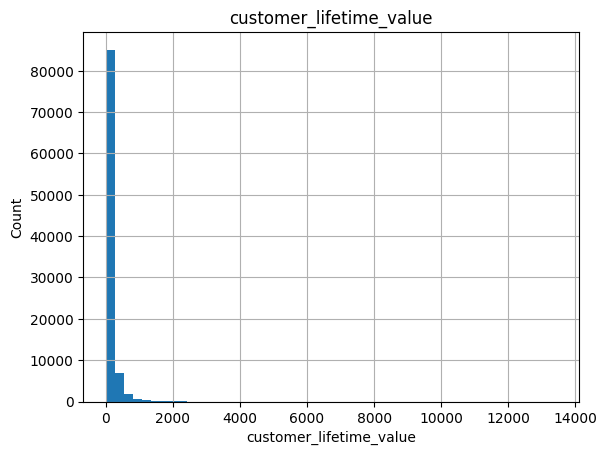

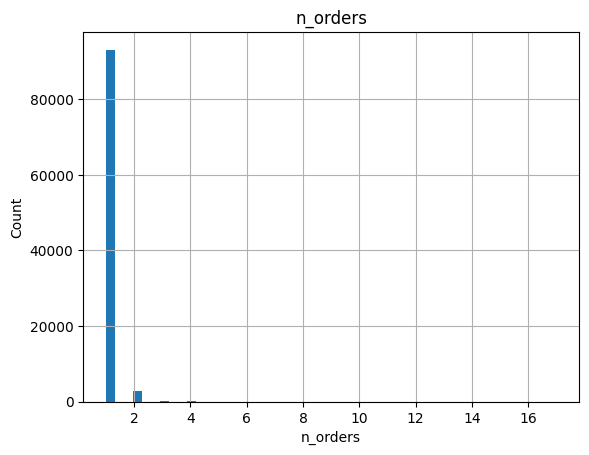

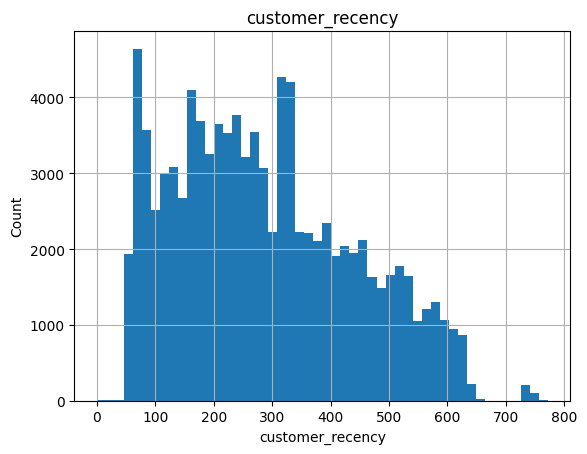

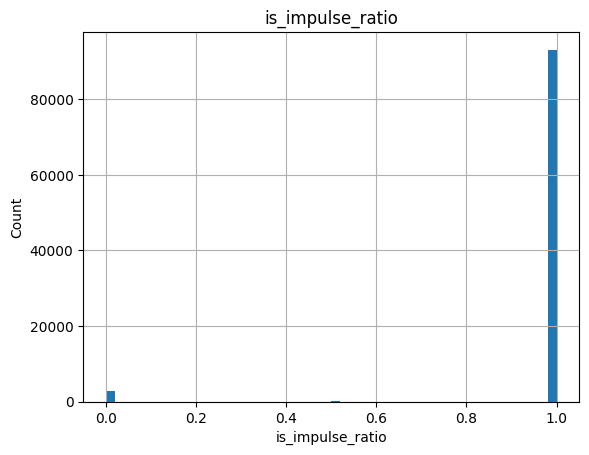

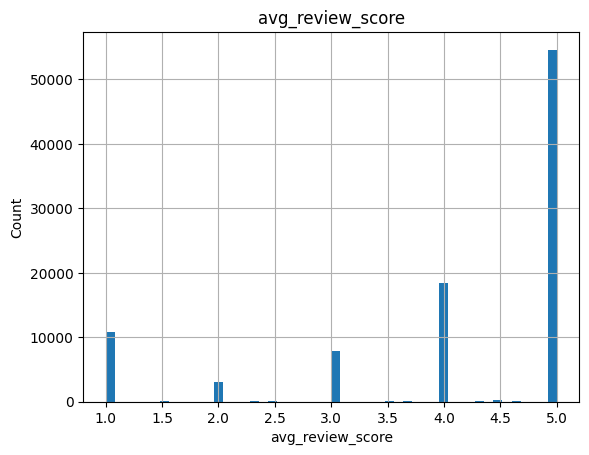

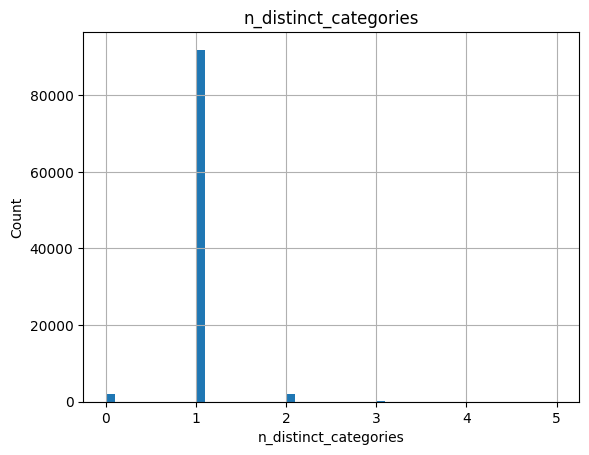

In [ ]:
"""
Visualize distributions of key customer metrics.
- Plots histograms for LTV, number of orders, recency, impulse ratio, etc.
"""

hist_cols = [
    "customer_lifetime_value",
    "n_orders",
    "customer_recency",
    "is_impulse_ratio",
    "avg_review_score",
    "n_distinct_categories",
]

for col in hist_cols:
    if col in master_df.columns:
        plt.figure()
        master_df[col].hist(bins=50)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()
    else:
        print(f"Column {col} not in master_df")


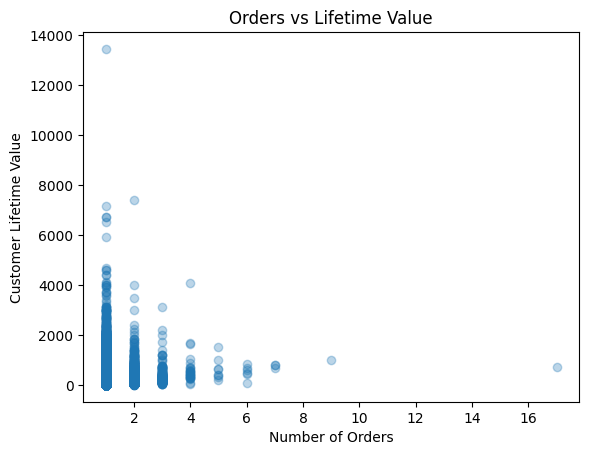

In [ ]:
"""
Scatter plot: Number of Orders vs. Customer Lifetime Value.
"""
if {"n_orders", "customer_lifetime_value"}.issubset(master_df.columns):
    plt.figure()
    plt.scatter(
        master_df["n_orders"],
        master_df["customer_lifetime_value"],
        alpha=0.3
    )
    plt.xlabel("Number of Orders")
    plt.ylabel("Customer Lifetime Value")
    plt.title("Orders vs Lifetime Value")
    plt.show()


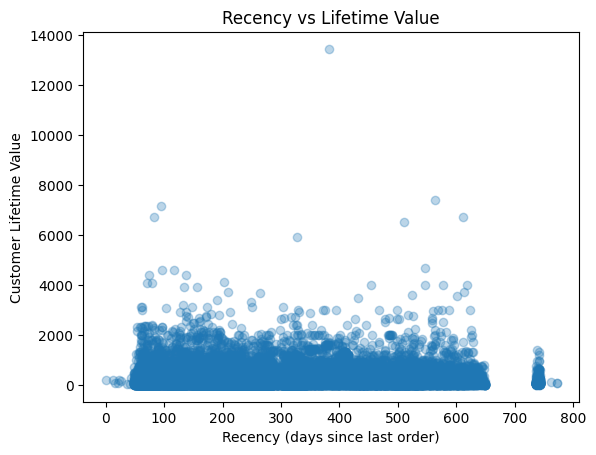

In [ ]:
"""
Scatter plot: Customer Recency vs. Customer Lifetime Value.
"""
import matplotlib.pyplot as plt

if {"customer_recency", "customer_lifetime_value"}.issubset(master_df.columns):
    plt.figure()
    plt.scatter(
        master_df["customer_recency"],
        master_df["customer_lifetime_value"],
        alpha=0.3
    )
    plt.xlabel("Recency (days since last order)")
    plt.ylabel("Customer Lifetime Value")
    plt.title("Recency vs Lifetime Value")
    plt.show()
else:
    print("Missing columns for plot")


In [ ]:
"""
Filter dataset to retain only 'Active' customers.
- Keeps customers who have made at least 1 order.
"""
active_customers = master_df[master_df["n_orders"] > 0].copy()
print("Active customers shape:", active_customers.shape)


Active customers shape: (96096, 32)


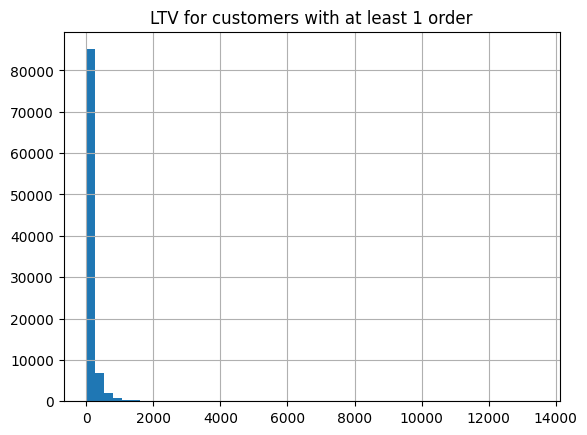

In [ ]:
"""
Histogram of Customer Lifetime Value for active customers only.
"""
active_customers["customer_lifetime_value"].hist(bins=50)
plt.title("LTV for customers with at least 1 order")
plt.show()

In [ ]:
# Create a unified n_distinct_sellers (take max of the two where both exist)
if "n_distinct_sellers_x" in master_df.columns and "n_distinct_sellers_y" in master_df.columns:
    master_df["n_distinct_sellers"] = master_df[
        ["n_distinct_sellers_x", "n_distinct_sellers_y"]
    ].max(axis=1)

    master_df = master_df.drop(columns=["n_distinct_sellers_x", "n_distinct_sellers_y"])

print("Columns after cleaning sellers:")
print([c for c in master_df.columns if "sellers" in c])

Columns after cleaning sellers:
['n_distinct_sellers']


In [ ]:
active_customers = master_df[master_df["n_orders"] > 0].copy()

num_cols = active_customers.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns in active_customers:")
print(num_cols)


Numeric columns in active_customers:
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers']


In [ ]:
num_cols = active_customers.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numeric columns in active_customers:")
print(num_cols)

print("\nSummary stats for key columns:")
print(
    active_customers[
        [
            "customer_lifetime_value",
            "n_orders",
            "customer_recency",
            "customer_lifetime_days",
            "is_impulse_ratio",
            "avg_review_score",
            "n_distinct_categories",
            "n_distinct_sellers",
        ]
    ].describe().T
)


Numeric columns in active_customers:
['customer_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers']

Summary stats for key columns:
                           count        mean         std   min    25%    50%  \
customer_lifetime_value  95420.0  142.440198  217.656355  0.85   47.9   89.9   
n_orders                 96096.0    1.034809    0.214384  1.00    1.0    1.0   
customer_recency         96096.0  287.735691  153.414676  0.00  163.0  268.0   
customer_lifetime_days   96096.0    2.711507   25.393343  0.00    0.0    0.0   
is_impulse_ratio         96096.0    0.970506    0.16

In [ ]:
feature_cols = [
    "customer_lifetime_value",
    "n_orders",
    "customer_recency",
    "customer_lifetime_days",
    "avg_review_score",
    "n_distinct_categories",
    "n_distinct_sellers",
    "geolocation_lat",
    "geolocation_lng",
]

# Keep only columns that actually exist
feature_cols = [c for c in feature_cols if c in active_customers.columns]
print("Features for KMeans:", feature_cols)

# Feature matrix
X = active_customers[feature_cols].copy()
X = X.fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X shape:", X.shape)
print("X_scaled shape:", X_scaled.shape)

Features for KMeans: ['customer_lifetime_value', 'n_orders', 'customer_recency', 'customer_lifetime_days', 'avg_review_score', 'n_distinct_categories', 'n_distinct_sellers', 'geolocation_lat', 'geolocation_lng']
X shape: (96096, 9)
X_scaled shape: (96096, 9)


Inertias: [(2, 685488.9578861325), (3, 596509.1760529615), (4, 529940.189373794), (5, 479635.6535344503), (6, 430321.5124262269), (7, 386271.5233442955), (8, 347312.9642927107), (9, 328511.7787000722), (10, 314058.13780271244)]


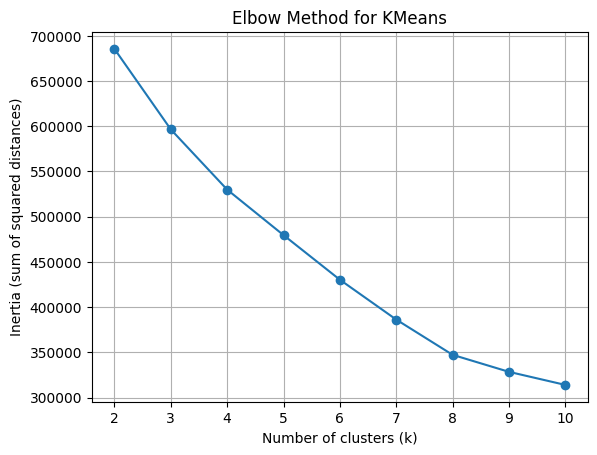

In [ ]:
"""
Determine optimal K using the Elbow Method.
- Fits K-Means for k=2 to 10.
- Plots inertia values to identify the 'elbow' point.
"""
inertias = []
ks = range(2, 11)  # try k = 2 to 10

for k in ks:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10,      # to avoid sklearn warning
    )
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

print("Inertias:", list(zip(ks, inertias)))

plt.figure()
plt.plot(ks, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.title("Elbow Method for KMeans")
plt.xticks(list(ks))
plt.grid(True)
plt.show()

In [ ]:
k=4
kmeans_final = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10,
)
kmeans_final.fit(X_scaled)

# Cluster labels for each row in active_customers
active_customers["cluster"] = kmeans_final.labels_

print("Cluster counts:")
print(active_customers["cluster"].value_counts().sort_index())

Cluster counts:
cluster
0    64035
1    19043
2     2817
3    10201
Name: count, dtype: int64


In [ ]:
cluster_means = active_customers.groupby("cluster")[
    [
        "customer_lifetime_value",
        "n_orders",
        "customer_recency",
        "customer_lifetime_days",
        "avg_review_score",
        "n_distinct_categories",
        "n_distinct_sellers",
    ]
].mean().round(2)

cluster_counts = active_customers["cluster"].value_counts().sort_index()

print("Cluster sizes:\n", cluster_counts, "\n")
print(cluster_means)


Cluster sizes:
 cluster
0    64035
1    19043
2     2817
3    10201
Name: count, dtype: int64 

         customer_lifetime_value  n_orders  customer_recency  \
cluster                                                        
0                         131.35      1.01            284.64   
1                         145.18      1.01            295.67   
2                         258.77      1.94            258.96   
3                         175.03      1.01            300.28   

         customer_lifetime_days  avg_review_score  n_distinct_categories  \
cluster                                                                    
0                          0.11              4.75                   0.99   
1                          0.16              1.86                   0.96   
2                         88.31              3.91                   1.78   
3                          0.16              3.95                   0.99   

         n_distinct_sellers  
cluster                      
0 

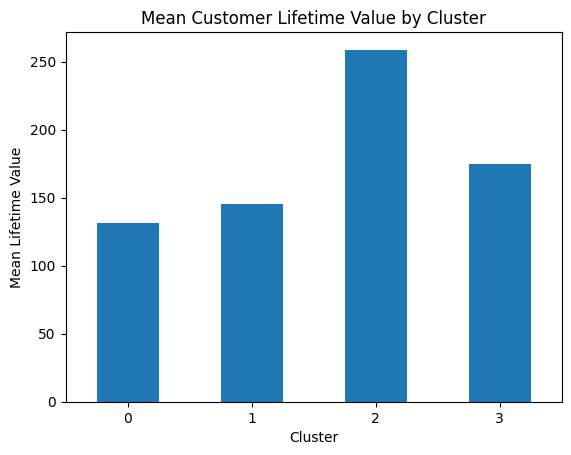

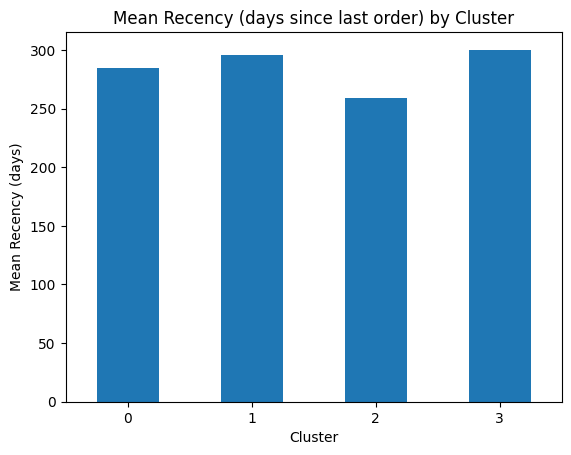

In [ ]:
import matplotlib.pyplot as plt

#mean lifetime value per cluster
ltv_by_cluster = (
    active_customers
    .groupby("cluster")["customer_lifetime_value"]
    .mean()
    .round(2)
)



plt.figure()
ltv_by_cluster.plot(kind="bar")
plt.title("Mean Customer Lifetime Value by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Lifetime Value")
plt.xticks(rotation=0)
plt.show()



#Mean recency per cluster
recency_by_cluster = (
    active_customers
    .groupby("cluster")["customer_recency"]
    .mean()
    .round(2)
)



plt.figure()
recency_by_cluster.plot(kind="bar")
plt.title("Mean Recency (days since last order) by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Mean Recency (days)")
plt.xticks(rotation=0)
plt.show()


<Figure size 640x480 with 0 Axes>

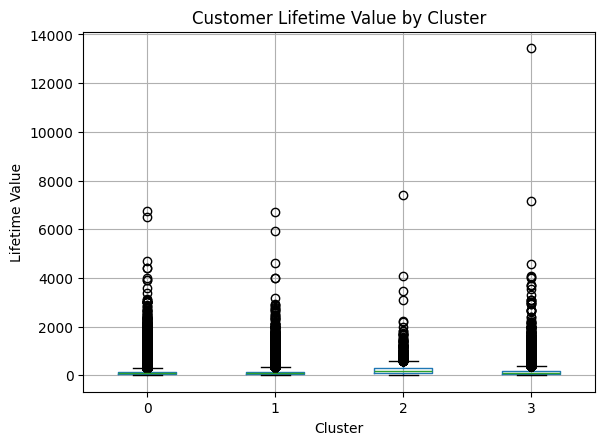

In [ ]:
plt.figure()
active_customers.boxplot(
    column="customer_lifetime_value",
    by="cluster"
)
plt.title("Customer Lifetime Value by Cluster")
plt.suptitle("")
plt.xlabel("Cluster")
plt.ylabel("Lifetime Value")
plt.show()

In [ ]:
"""
Calculate the Silhouette Score for the current clustering configuration.
- Measures how similar an object is to its own cluster compared to other clusters.
"""
from sklearn.metrics import silhouette_score, silhouette_samples

# Overall average silhouette score
avg_silhouette_score = silhouette_score(X_scaled, kmeans_final.labels_)
print(f"The average Silhouette Score for k={kmeans_final.n_clusters} is: {avg_silhouette_score:.4f}")


The average Silhouette Score for k=4 is: 0.2949



Generating Silhouette Plot...


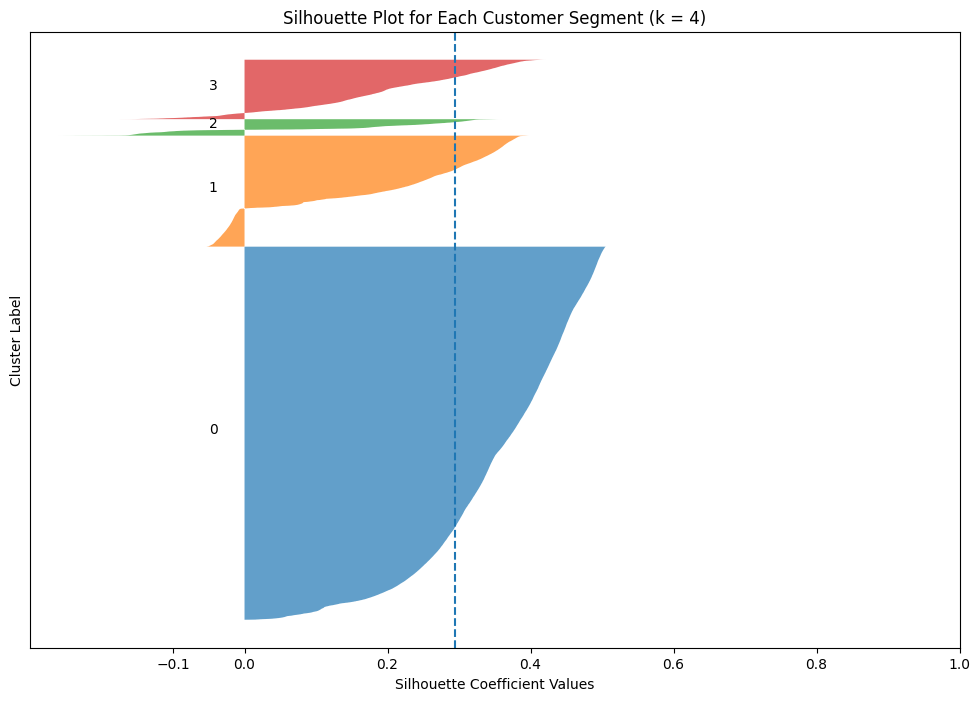

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples

# Compute silhouette values for each sample
sample_silhouette_values = silhouette_samples(X_scaled, kmeans_final.labels_)

print("\nGenerating Silhouette Plot...")
plt.figure(figsize=(12, 8))

y_lower = 10
n_clusters = kmeans_final.n_clusters
labels = kmeans_final.labels_

for i in range(n_clusters):
    # Silhouette values for cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Horizontal silhouette bars for this cluster
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,  # transparency
    )

    # Label the cluster number
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Next cluster starts a bit lower for spacing
    y_lower = y_upper + 10

plt.title("Silhouette Plot for Each Customer Segment (k = 4)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

# Vertical line for average silhouette score
plt.axvline(x=avg_silhouette_score, linestyle="--")

# Clean axes
plt.yticks([])
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.show()


In [ ]:

"""
Apply final K-Means model (k=4).
- Assigns cluster labels to the active customers dataframe.
"""
from sklearn.model_selection import train_test_split

df = active_customers.copy()

y_cls = df["cluster"]

drop_cols = [
    "cluster",
    "customer_id",
    "customer_unique_id",
    "customer_zip_code_prefix",
    "first_order_date",
    "last_order_date",
    "last_review_date",
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print("Columns remaining for features:", df.columns.tolist())

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumeric feature columns:", num_cols)
print("\nCategorical feature columns:", cat_cols)

df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("Unknown")

X_cls = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nFinal shape of X_cls (after one-hot):", X_cls.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)

Columns remaining for features: ['cust_city', 'cust_state', 'geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'top_category', 'customer_lifetime_value', 'n_distinct_sellers']

Numeric feature columns: ['geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers

In [ ]:
X_train.head()

,geolocation_lat,geolocation_lng,n_orders,n_delivered,n_is_impulse,customer_recency,is_impulse_ratio,customer_lifetime_days,total_revenue,total_freight,...,top_category_security_and_services,top_category_signaling_and_security,top_category_small_appliances,top_category_small_appliances_home_oven_and_coffee,top_category_sports_leisure,top_category_stationery,top_category_tablets_printing_image,top_category_telephony,top_category_toys,top_category_watches_gifts
30519,-0.862741,-48.135873,1,0,0,442,0.0,0,89.99,25.91,...,False,False,False,False,False,False,False,False,False,False
51681,-22.427802,-44.306273,2,2,0,227,1.0,0,263.80,33.85,...,False,False,False,False,False,False,False,False,False,False
2041,-23.472641,-46.554052,2,2,0,248,1.0,0,278.90,52.48,...,False,False,False,False,False,False,False,False,False,False
62139,-18.998345,-46.309358,1,1,0,292,1.0,0,38.90,44.81,...,False,False,False,False,False,False,False,False,True,False
44913,-23.012987,-43.465520,1,1,0,363,1.0,0,169.99,36.85,...,False,False,False,False,False,False,False,False,False,False


we have cust_city and state  which is giving too many columns as we are using one-hot encoding. This is redundant information as we already have geolat and geolong and this points clearly gives us the location information without the city and state.

In [ ]:
"""
Analyze cluster characteristics.
- Groups data by cluster and calculates mean values for key features to define segment profiles.
"""
import pandas as pd
from sklearn.model_selection import train_test_split

df = active_customers.copy()

# Target
y_cls = df["cluster"]

# Drop columns we don't want as features
drop_cols = [
    "cluster",
    "customer_id",
    "customer_unique_id",
    "customer_zip_code_prefix",
    "first_order_date",
    "last_order_date",
    "last_review_date",
    "cust_city",    # drop, we have lat/lng
    "cust_state",   # drop, we have lat/lng
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

# Identify numeric & categorical
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)  # should be mostly things like top_category

# Fill missing
df[num_cols] = df[num_cols].fillna(0)
df[cat_cols] = df[cat_cols].fillna("Unknown")

# One-hot encode remaining categoricals (e.g. top_category)
X_cls = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("Final X_cls shape:", X_cls.shape)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42, stratify=y_cls
)

print("Train shape:", X_train.shape, " Test shape:", X_test.shape)


Numeric: ['geolocation_lat', 'geolocation_lng', 'n_orders', 'n_delivered', 'n_is_impulse', 'customer_recency', 'is_impulse_ratio', 'customer_lifetime_days', 'total_revenue', 'total_freight', 'avg_order_value', 'avg_items_per_order', 'avg_products_per_order', 'total_payment_value', 'avg_payment_installments', 'avg_payments_per_order', 'n_reviews', 'avg_review_score', 'n_low_reviews', 'n_distinct_categories', 'customer_lifetime_value', 'n_distinct_sellers']
Categorical: ['top_category']
Final X_cls shape: (96096, 93)
Train shape: (76876, 93)  Test shape: (19220, 93)


In [ ]:
X_train.head()

,geolocation_lat,geolocation_lng,n_orders,n_delivered,n_is_impulse,customer_recency,is_impulse_ratio,customer_lifetime_days,total_revenue,total_freight,...,top_category_security_and_services,top_category_signaling_and_security,top_category_small_appliances,top_category_small_appliances_home_oven_and_coffee,top_category_sports_leisure,top_category_stationery,top_category_tablets_printing_image,top_category_telephony,top_category_toys,top_category_watches_gifts
30519,-0.862741,-48.135873,1,0,0,442,0.0,0,89.99,25.91,...,False,False,False,False,False,False,False,False,False,False
51681,-22.427802,-44.306273,2,2,0,227,1.0,0,263.80,33.85,...,False,False,False,False,False,False,False,False,False,False
2041,-23.472641,-46.554052,2,2,0,248,1.0,0,278.90,52.48,...,False,False,False,False,False,False,False,False,False,False
62139,-18.998345,-46.309358,1,1,0,292,1.0,0,38.90,44.81,...,False,False,False,False,False,False,False,False,True,False
44913,-23.012987,-43.465520,1,1,0,363,1.0,0,169.99,36.85,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Running GridSearchCV for Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Best params (Logistic Regression): {'C': 1.0, 'class_weight': None}
Best CV accuracy: 0.9755

Logistic Regression Test Accuracy: 0.9706

Classification report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12808
           1       0.95      0.98      0.97      3809
           2       0.93      0.78      0.85       563
           3       0.92      0.87      0.89      2040

    accuracy                           0.97     19220
   macro avg       0.95      0.90      0.92     19220
weighted avg       0.97      0.97      0.97     19220



<Figure size 640x480 with 0 Axes>

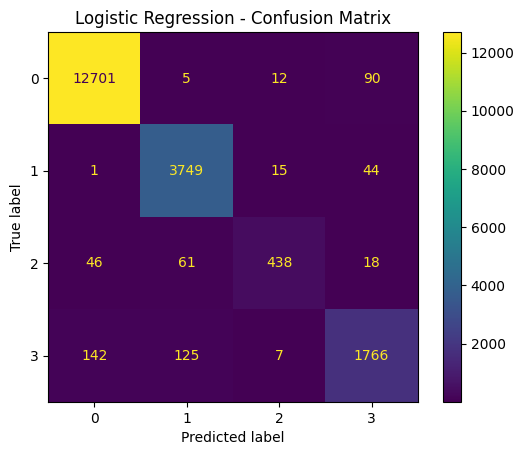

In [ ]:
"""
Train and evaluate Logistic Regression.
- Uses GridSearchCV for hyperparameter tuning.
- Metrics: Accuracy, Classification Report, Confusion Matrix.
"""
log_reg = LogisticRegression(
    max_iter = 1000,
    multi_class = "multinomial",
    n_jobs=-1
)

param_grid_lr = {
    "C" : [0.1,1.0,10.0],
    "class_weight" : [None, "balanced"]
}

lr_grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid_lr,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)


print("Running GridSearchCV for Logistic Regression...")
lr_grid.fit(X_train, y_train)

print("\nBest params (Logistic Regression):", lr_grid.best_params_)
print("Best CV accuracy:", f"{lr_grid.best_score_:.4f}")

#evaluate best model on test set
lr_best = lr_grid.best_estimator_
y_pred_lr = lr_best.predict(X_test)

test_acc_lr = accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Test Accuracy:", f"{test_acc_lr:.4f}")

print("\nClassification report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


#confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
plt.figure()
disp.plot()
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


In [ ]:
"""
Scale data specifically for SVM models.
- LinearSVC and other SVMs require feature scaling for convergence and performance.
"""
svm_scalar = StandardScaler()
X_train_svm = svm_scalar.fit_transform(X_train)
X_test_svm = svm_scalar.transform(X_test)

print("X_train_svm shape:", X_train_svm.shape)
print("X_test_svm shape:", X_test_svm.shape)

X_train_svm shape: (76876, 93)
X_test_svm shape: (19220, 93)


In [ ]:
svm_results = []


Running GridSearchCV for LinearSVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best params (LinearSVC): {'C': 10.0, 'loss': 'squared_hinge'}
Best CV accuracy (LinearSVC): 0.9960

LinearSVC Test Accuracy: 0.9968

Classification report (LinearSVC):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       1.00      0.99      1.00      3809
           2       0.98      0.99      0.99       563
           3       0.99      0.99      0.99      2040

    accuracy                           1.00     19220
   macro avg       0.99      0.99      0.99     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

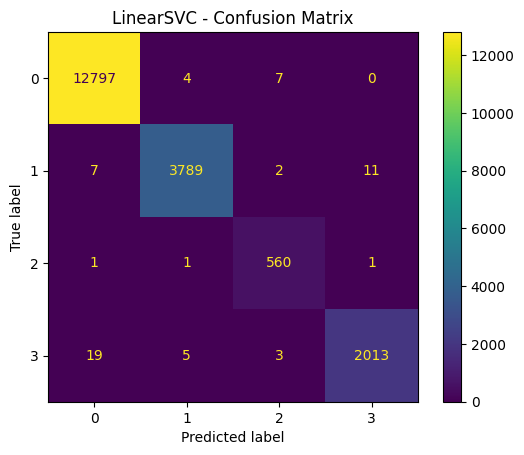

In [ ]:
"""
Scale data specifically for SVM models.
- LinearSVC and other SVMs require feature scaling for convergence and performance.
"""
svm_classifier = LinearSVC(random_state =42, max_iter=5000)

param_grid_linear = {
    "C": [0.1,1.0, 10.0],
    "loss" : ["hinge", "squared_hinge"]

}

print("\nRunning GridSearchCV for LinearSVC...")
linear_grid = GridSearchCV(
    estimator=svm_classifier,
    param_grid=param_grid_linear,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

linear_grid.fit(X_train_svm, y_train)
print("\nBest params (LinearSVC):", linear_grid.best_params_)
print("Best CV accuracy (LinearSVC):", f"{linear_grid.best_score_:.4f}")

svm_linear_best = linear_grid.best_estimator_
y_pred_linear = svm_linear_best.predict(X_test_svm)

linear_test_acc = accuracy_score(y_test, y_pred_linear)
print("\nLinearSVC Test Accuracy:", f"{linear_test_acc:.4f}")
print("\nClassification report (LinearSVC):")
print(classification_report(y_test, y_pred_linear))

svm_results.append(("LinearSVC", linear_grid.best_score_, linear_test_acc))

cm_linear = confusion_matrix(y_test, y_pred_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_linear)
plt.figure()
disp.plot()
plt.title("LinearSVC - Confusion Matrix")
plt.show()


Running GridSearchCV for SVC (linear kernel)...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best params (SVC linear): {'C': 10.0, 'class_weight': None}
Best CV accuracy (SVC linear): 0.9991

SVC (linear) Test Accuracy: 0.9991

Classification report (SVC linear):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       1.00      1.00      1.00      3809
           2       0.99      1.00      1.00       563
           3       1.00      1.00      1.00      2040

    accuracy                           1.00     19220
   macro avg       1.00      1.00      1.00     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

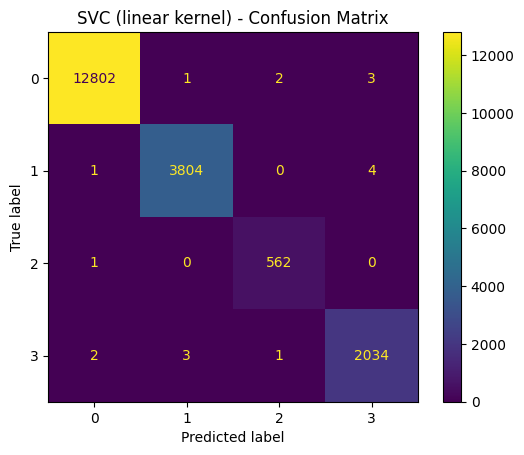

In [ ]:
"""
Scale data specifically for SVM models.
- LinearSVC and other SVMs require feature scaling for convergence and performance.
"""
svc_linear = SVC(kernel='linear', random_state=42)

param_grid_svc_linear = {
    'C': [0.1,1.0,10.0],
    "class_weight": [None, "balanced"]
}

print("\nRunning GridSearchCV for SVC (linear kernel)...")
svc_linear_grid = GridSearchCV(
    estimator=svc_linear,
    param_grid=param_grid_svc_linear,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

svc_linear_grid.fit(X_train_svm, y_train)



print("\nBest params (SVC linear):", svc_linear_grid.best_params_)
print("Best CV accuracy (SVC linear):", f"{svc_linear_grid.best_score_:.4f}")


svc_linear_best = svc_linear_grid.best_estimator_
y_pred_svc_linear = svc_linear_best.predict(X_test_svm)

svc_linear_test_acc = accuracy_score(y_test, y_pred_svc_linear)

print("\nSVC (linear) Test Accuracy:", f"{svc_linear_test_acc:.4f}")

print("\nClassification report (SVC linear):")
print(classification_report(y_test, y_pred_svc_linear))

svm_results.append(("SVC_linear", svc_linear_grid.best_score_, svc_linear_test_acc))

# Confusion matrix
cm_svc_linear = confusion_matrix(y_test, y_pred_svc_linear)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_linear)
plt.figure()
disp.plot()
plt.title("SVC (linear kernel) - Confusion Matrix")
plt.show()



Running GridSearchCV for SVC (rbf kernel)...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best params (SVC RBF): {'C': 10.0, 'gamma': 0.01}
Best CV accuracy (SVC RBF): 0.9942

SVC (RBF) Test Accuracy: 0.9953

Classification report (SVC RBF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       0.99      0.99      0.99      3809
           2       0.99      0.98      0.98       563
           3       0.99      0.98      0.99      2040

    accuracy                           1.00     19220
   macro avg       0.99      0.99      0.99     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

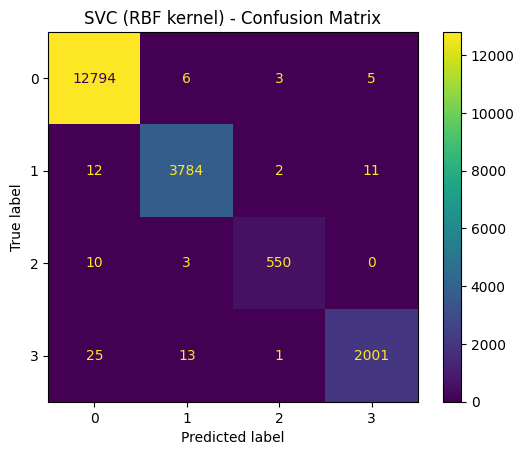

In [ ]:
"""
Train and evaluate SVC with Radial Basis Function (RBF) Kernel.
- Tuning 'C' and 'gamma'.
"""
svc_rbf = SVC(kernel = "rbf", random_state=42)

param_grid_rbf = {
    "C": [0.1,1.0,10.0],
    "gamma":["scale", 0.01]
}

print("\nRunning GridSearchCV for SVC (rbf kernel)...")
rbf_grid = GridSearchCV(
    estimator=svc_rbf,
    param_grid=param_grid_rbf,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

rbf_grid.fit(X_train_svm, y_train)

print("\nBest params (SVC RBF):", rbf_grid.best_params_)
print("Best CV accuracy (SVC RBF):", f"{rbf_grid.best_score_:.4f}")

svc_rbf_best = rbf_grid.best_estimator_
y_pred_rbf = svc_rbf_best.predict(X_test_svm)

rbf_test_acc = accuracy_score(y_test, y_pred_rbf)
print("\nSVC (RBF) Test Accuracy:", f"{rbf_test_acc:.4f}")

print("\nClassification report (SVC RBF):")
print(classification_report(y_test, y_pred_rbf))

# Save results if you're tracking them
svm_results.append(("SVC_rbf", rbf_grid.best_score_, rbf_test_acc))

# Confusion matrix
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf)
plt.figure()
disp.plot()
plt.title("SVC (RBF kernel) - Confusion Matrix")
plt.show()


Running GridSearchCV for SVC (poly kernel)...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best params (SVC poly): {'C': 10.0, 'gamma': 0.01}
Best CV accuracy (SVC poly): 0.9942

SVC (poly) Test Accuracy: 0.9953

Classification report (SVC poly):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       0.99      0.99      0.99      3809
           2       0.99      0.98      0.98       563
           3       0.99      0.98      0.99      2040

    accuracy                           1.00     19220
   macro avg       0.99      0.99      0.99     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

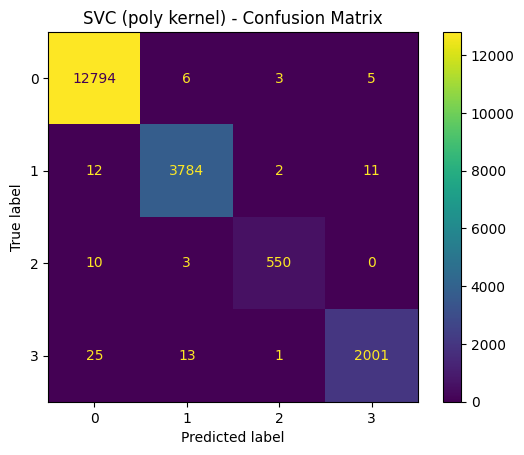

In [ ]:
"""
Train and evaluate SVC with Polynomial Kernel.
- Tuning 'degree', 'gamma', and 'coef0'.
"""
svc_poly = SVC(kernel = "poly", random_state=42)

param_grid_poly = {
    "C": [0.1,1.0,10.0],
    "degree": [2,3],
    "gamma":["scale", 0.01],
    "coef0": [0.0,1.0]
}

print("\nRunning GridSearchCV for SVC (poly kernel)...")
poly_grid = GridSearchCV(
    estimator=svc_rbf,
    param_grid=param_grid_rbf,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

poly_grid.fit(X_train_svm, y_train)

print("\nBest params (SVC poly):", poly_grid.best_params_)
print("Best CV accuracy (SVC poly):", f"{poly_grid.best_score_:.4f}")

svc_poly_best = poly_grid.best_estimator_
y_pred_poly = svc_poly_best.predict(X_test_svm)

poly_test_acc = accuracy_score(y_test, y_pred_rbf)
print("\nSVC (poly) Test Accuracy:", f"{poly_test_acc:.4f}")

print("\nClassification report (SVC poly):")
print(classification_report(y_test, y_pred_poly))

# Save results if you're tracking them
svm_results.append(("SVC_poly", poly_grid.best_score_, poly_test_acc))

# Confusion matrix
cm_poly = confusion_matrix(y_test, y_pred_poly)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly)
plt.figure()
disp.plot()
plt.title("SVC (poly kernel) - Confusion Matrix")
plt.show()

In [ ]:

"""
Compare performance of different SVM kernels.
- Outputs a table of CV and Test accuracies.
"""
svm_results_df = pd.DataFrame(svm_results, columns=["Model", "Best CV Accuracy", "Test Accuracy"])
print("\n=== SVM model comparison ===")
print(svm_results_df.sort_values("Test Accuracy", ascending=False))



=== SVM model comparison ===
        Model  Best CV Accuracy  Test Accuracy
1  SVC_linear          0.999076       0.999063
0   LinearSVC          0.995955       0.996826
2     SVC_rbf          0.994159       0.995265
3    SVC_poly          0.994159       0.995265


In [ ]:
from sklearn.tree import DecisionTreeClassifier


Running GridSearchCV for Decision Tree...
Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best params (Decision Tree): {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV accuracy (Decision Tree): 0.9970

Decision Tree Test Accuracy: 0.9972

Classification report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       1.00      1.00      1.00      3809
           2       0.99      0.98      0.99       563
           3       0.99      0.99      0.99      2040

    accuracy                           1.00     19220
   macro avg       1.00      0.99      0.99     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

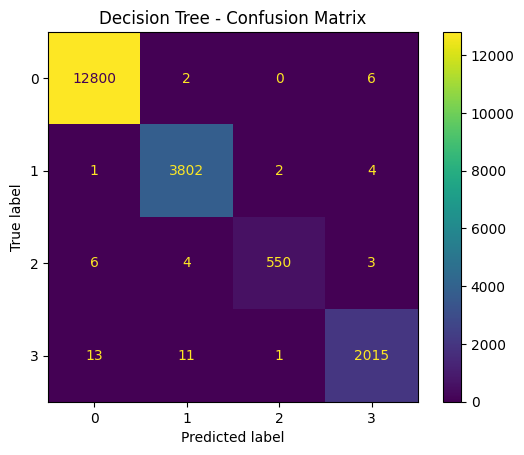

In [ ]:
"""
Extract and plot Feature Importance from Random Forest.
- Identifies top 15 drivers of customer segmentation.
"""
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    "max_depth" : [5, 10, 20],
    "min_samples_split": [2,10,50],
    "min_samples_leaf": [1,5,10],
    "criterion": ["gini", "entropy"]

}

print("\nRunning GridSearchCV for Decision Tree...")

dt_grid = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid_dt,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

dt_grid.fit(X_train, y_train)

print("\nBest params (Decision Tree):", dt_grid.best_params_)
print("Best CV accuracy (Decision Tree):", f"{dt_grid.best_score_:.4f}")

# Best model
dt_best = dt_grid.best_estimator_
y_pred_dt = dt_best.predict(X_test)

# Test accuracy
test_acc_dt = accuracy_score(y_test, y_pred_dt)
print("\nDecision Tree Test Accuracy:", f"{test_acc_dt:.4f}")

print("\nClassification report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
plt.figure()
disp.plot()
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier


Running GridSearchCV for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Best params (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best CV accuracy (Random Forest): 0.9957

Random Forest Test Accuracy: 0.9969

Classification report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       1.00      1.00      1.00      3809
           2       0.99      0.99      0.99       563
           3       0.99      0.98      0.99      2040

    accuracy                           1.00     19220
   macro avg       0.99      0.99      0.99     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

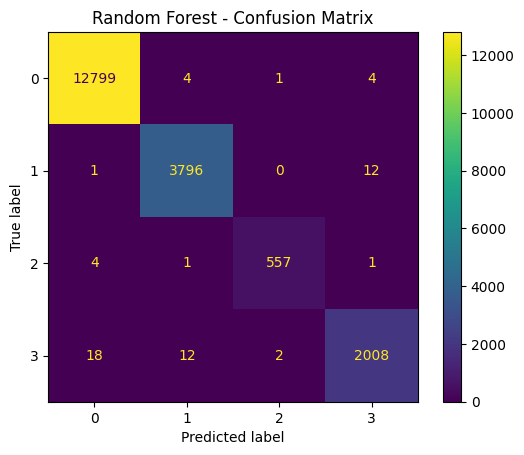

In [ ]:
"""
Extract and plot Feature Importance from Random Forest.
- Identifies top 15 drivers of customer segmentation.
"""
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 5],
}

print("\nRunning GridSearchCV for Random Forest...")
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

print("\nBest params (Random Forest):", rf_grid.best_params_)
print("Best CV accuracy (Random Forest):", f"{rf_grid.best_score_:.4f}")

rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)

rf_test_acc = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Test Accuracy:", f"{rf_test_acc:.4f}")

print("\nClassification report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
plt.figure()
disp.plot()
plt.title("Random Forest - Confusion Matrix")
plt.show()


Top 20 important features (Random Forest):
                     feature  importance
17          avg_review_score    0.287099
18             n_low_reviews    0.251615
0            geolocation_lat    0.181612
1            geolocation_lng    0.122739
21        n_distinct_sellers    0.026569
19     n_distinct_categories    0.021309
9              total_freight    0.017873
3                n_delivered    0.015780
16                 n_reviews    0.012407
2                   n_orders    0.011330
7     customer_lifetime_days    0.008882
6           is_impulse_ratio    0.007163
13       total_payment_value    0.004567
10           avg_order_value    0.004365
20   customer_lifetime_value    0.004111
8              total_revenue    0.004052
5           customer_recency    0.003603
11       avg_items_per_order    0.003411
12    avg_products_per_order    0.002333
14  avg_payment_installments    0.001470


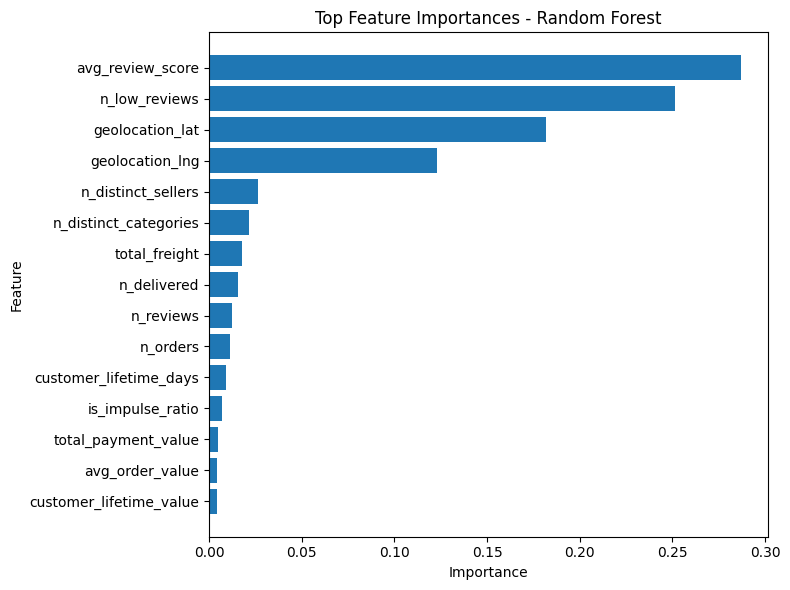

In [ ]:
"""
Extract and plot Feature Importance from Random Forest.
- Identifies top 15 drivers of customer segmentation.
"""
importances = rf_best.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nTop 20 important features (Random Forest):")
print(feat_imp.head(20))

# Plot top 15
top_n = 15
top_feat = feat_imp.head(top_n)

plt.figure(figsize=(8, 6))
plt.barh(top_feat["feature"], top_feat["importance"])
plt.gca().invert_yaxis()
plt.title("Top Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
import joblib

# 1. Save the feature names (VERY important to keep same order later)
feature_names = list(X_train.columns)
joblib.dump(feature_names, "feature_names.pkl")

# 2. Save tree / linear models (no scaler needed)
joblib.dump(lr_best,          "model_logreg.pkl")
joblib.dump(dt_best,          "model_decision_tree.pkl")
joblib.dump(rf_best,          "model_random_forest.pkl")

# 3. Save SVM models + scaler
joblib.dump(svm_scalar,       "scaler_svm.pkl")
joblib.dump(svm_linear_best,  "model_linearsvc.pkl")
joblib.dump(svc_linear_best,  "model_svc_linear.pkl")
joblib.dump(svc_rbf_best,     "model_svc_rbf.pkl")
joblib.dump(svc_poly_best,    "model_svc_poly.pkl")

['model_svc_poly.pkl']


Running GridSearchCV for AdaBoost...
Fitting 3 folds for each of 9 candidates, totalling 27 fits

Best params (AdaBoost): {'learning_rate': 0.5, 'n_estimators': 200}
Best CV accuracy (AdaBoost): 0.9872

AdaBoost Test Accuracy: 0.9896

Classification report (AdaBoost):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12808
           1       0.99      0.99      0.99      3809
           2       1.00      0.88      0.94       563
           3       0.97      0.97      0.97      2040

    accuracy                           0.99     19220
   macro avg       0.99      0.96      0.97     19220
weighted avg       0.99      0.99      0.99     19220



<Figure size 640x480 with 0 Axes>

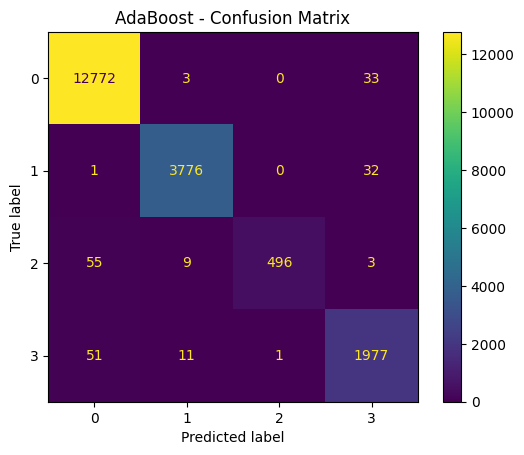

In [ ]:
"""
Train and evaluate AdaBoost Classifier.
- Uses Decision Tree Stumps as base estimator.
- Tuning n_estimators and learning_rate.
"""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Weak learner: shallow tree (stump or depth=2)
base_dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=1
)

ada = AdaBoostClassifier(
    estimator=base_dt,        # for newer sklearn; use base_estimator=base_dt if older
    random_state=42
)

# Small but useful grid
param_grid_ada = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.05, 0.1, 0.5],
}

print("\nRunning GridSearchCV for AdaBoost...")
ada_grid = GridSearchCV(
    estimator=ada,
    param_grid=param_grid_ada,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

ada_grid.fit(X_train, y_train)

print("\nBest params (AdaBoost):", ada_grid.best_params_)
print("Best CV accuracy (AdaBoost):", f"{ada_grid.best_score_:.4f}")

ada_best = ada_grid.best_estimator_
y_pred_ada = ada_best.predict(X_test)

ada_test_acc = accuracy_score(y_test, y_pred_ada)
print("\nAdaBoost Test Accuracy:", f"{ada_test_acc:.4f}")

print("\nClassification report (AdaBoost):")
print(classification_report(y_test, y_pred_ada))

cm_ada = confusion_matrix(y_test, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
plt.figure()
disp.plot()
plt.title("AdaBoost - Confusion Matrix")
plt.show()

# (Optional) log into common results list
try:
    clf_results
except NameError:
    clf_results = []
clf_results.append(("AdaBoost", ada_grid.best_score_, ada_test_acc))


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
"""
Train and evaluate XGBoost Classifier.
- Uses 'multi:softmax' objective.
- Tuning learning rate, depth, and subsample.
"""
xgb = XGBClassifier(
    objective="multi:softmax",  # directly outputs class labels 0..3
    num_class=4,
    eval_metric="mlogloss",
    tree_method="hist",         # fast histogram-based tree builder
    random_state=42,
    n_jobs=-1
)

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0],
}
# 2×2×2×2 = 16 combos × 3-fold CV = 48 fits → heavy but acceptable



Running GridSearchCV for XGBoost...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best params (XGBoost): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best CV accuracy (XGBoost): 0.9986

XGBoost Test Accuracy: 0.9988

Classification report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       1.00      1.00      1.00      3809
           2       0.99      1.00      1.00       563
           3       1.00      0.99      1.00      2040

    accuracy                           1.00     19220
   macro avg       1.00      1.00      1.00     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

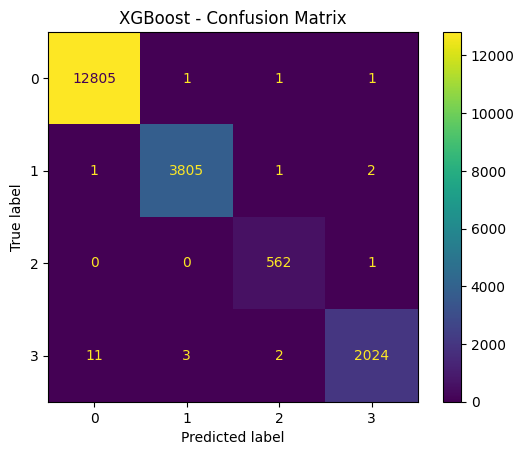

In [ ]:
print("\nRunning GridSearchCV for XGBoost...")
xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

xgb_grid.fit(X_train, y_train)

print("\nBest params (XGBoost):", xgb_grid.best_params_)
print("Best CV accuracy (XGBoost):", f"{xgb_grid.best_score_:.4f}")

xgb_best = xgb_grid.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

xgb_test_acc = accuracy_score(y_test, y_pred_xgb)
print("\nXGBoost Test Accuracy:", f"{xgb_test_acc:.4f}")

print("\nClassification report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
plt.figure()
disp.plot()
plt.title("XGBoost - Confusion Matrix")
plt.show()

# (Optional) log result
try:
    clf_results
except NameError:
    clf_results = []
clf_results.append(("XGBoost", xgb_grid.best_score_, xgb_test_acc))


In [ ]:
import pandas as pd

clf_results_df = pd.DataFrame(clf_results, columns=["Model", "Best CV Accuracy", "Test Accuracy"])
print("\n=== Classifier comparison ===")
print(clf_results_df.sort_values("Test Accuracy", ascending=False))



=== Classifier comparison ===
      Model  Best CV Accuracy  Test Accuracy
1   XGBoost          0.998595       0.998751
0  AdaBoost          0.987239       0.989646


In [ ]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

clusters = sorted(y_train.unique())
per_cluster_importance = {}

for c in clusters:
    print(f"\n=== Cluster {c}: one-vs-rest RF ===")

    # Binary target: 1 for cluster c, 0 for others
    y_bin = (y_train == c).astype(int)

    # Use similar hyperparameters as rf_best
    rf_c = RandomForestClassifier(
        n_estimators=rf_best.n_estimators,
        max_depth=rf_best.max_depth,
        min_samples_split=rf_best.min_samples_split,
        min_samples_leaf=rf_best.min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )

    rf_c.fit(X_train, y_bin)

    importances_c = rf_c.feature_importances_
    feature_names = X_train.columns

    feat_imp_c = (
        pd.DataFrame({
            "feature": feature_names,
            "importance": importances_c
        })
        .sort_values("importance", ascending=False)
    )

    # Store for later if needed
    per_cluster_importance[c] = feat_imp_c

    print("Top 10 features for cluster", c)
    print(feat_imp_c.head(10))



=== Cluster 0: one-vs-rest RF ===
Top 10 features for cluster 0
                  feature  importance
17       avg_review_score    0.333294
18          n_low_reviews    0.280861
0         geolocation_lat    0.146237
1         geolocation_lng    0.107227
21     n_distinct_sellers    0.022046
9           total_freight    0.020216
3             n_delivered    0.014806
19  n_distinct_categories    0.011590
16              n_reviews    0.011302
6        is_impulse_ratio    0.007900

=== Cluster 1: one-vs-rest RF ===
Top 10 features for cluster 1
                  feature  importance
17       avg_review_score    0.429953
18          n_low_reviews    0.373214
0         geolocation_lat    0.058035
1         geolocation_lng    0.033842
3             n_delivered    0.017096
16              n_reviews    0.013761
6        is_impulse_ratio    0.012277
19  n_distinct_categories    0.009866
21     n_distinct_sellers    0.008315
9           total_freight    0.007505

=== Cluster 2: one-vs-rest RF ===

In [ ]:
import joblib

joblib.dump(ada_best, "model_adaboost.pkl")

print("Saved model_adaboost.pkl")


Saved model_adaboost.pkl


In [ ]:
import joblib

joblib.dump(xgb_best, "model_xgboost.pkl")

print("Saved model_xgboost.pkl")


Saved model_xgboost.pkl



Running GridSearchCV for GradientBoosting...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best params (GradientBoosting): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV accuracy (GradientBoosting): 0.9983

GradientBoosting Test Accuracy: 0.9989

Classification report (GradientBoosting):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12808
           1       1.00      1.00      1.00      3809
           2       0.99      1.00      1.00       563
           3       1.00      1.00      1.00      2040

    accuracy                           1.00     19220
   macro avg       1.00      1.00      1.00     19220
weighted avg       1.00      1.00      1.00     19220



<Figure size 640x480 with 0 Axes>

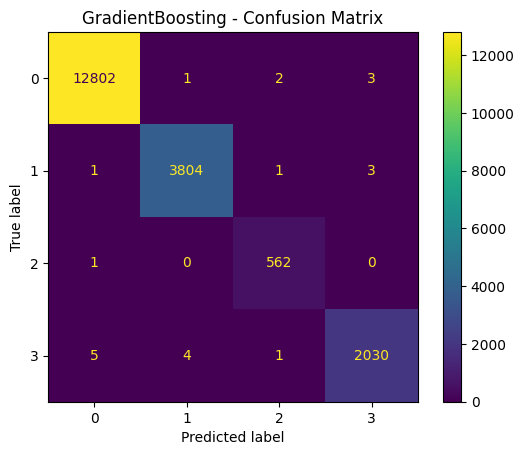

In [ ]:
"""
Train and evaluate Gradient Boosting Classifier.
- Standard Scikit-Learn implementation.
- Tuning estimators, learning rate, and depth.
"""
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Base Gradient Boosting model
gb = GradientBoostingClassifier(random_state=42)

# Small but useful grid (not too heavy)
param_grid_gb = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "subsample": [1.0, 0.8],   # 0.8 = stochastic gradient boosting
}

print("\nRunning GridSearchCV for GradientBoosting...")
gb_grid = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

gb_grid.fit(X_train, y_train)

print("\nBest params (GradientBoosting):", gb_grid.best_params_)
print("Best CV accuracy (GradientBoosting):", f"{gb_grid.best_score_:.4f}")

# Best model from GridSearch
gb_best = gb_grid.best_estimator_

# Evaluate on test set
y_pred_gb = gb_best.predict(X_test)

gb_test_acc = accuracy_score(y_test, y_pred_gb)
print("\nGradientBoosting Test Accuracy:", f"{gb_test_acc:.4f}")

print("\nClassification report (GradientBoosting):")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
plt.figure()
disp.plot()
plt.title("GradientBoosting - Confusion Matrix")
plt.show()

# (Optional) add to global classifier results
try:
    clf_results
except NameError:
    clf_results = []

clf_results.append(("GradientBoosting", gb_grid.best_score_, gb_test_acc))


In [ ]:
"""
Train and evaluate Gradient Boosting Classifier.
- Standard Scikit-Learn implementation.
- Tuning estimators, learning rate, and depth.
"""
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

clusters = sorted(y_train.unique())
gb_per_cluster_importance = {}

for c in clusters:
    print(f"\n=== Cluster {c}: one-vs-rest Gradient Boosting ===")

    # Binary target: 1 for cluster c, 0 for all others
    y_bin = (y_train == c).astype(int)

    # Use same hyperparameters as gb_best
    gb_c = GradientBoostingClassifier(
        n_estimators=gb_best.n_estimators,
        learning_rate=gb_best.learning_rate,
        max_depth=gb_best.max_depth,
        subsample=gb_best.subsample,
        random_state=42
    )

    gb_c.fit(X_train, y_bin)

    importances_c = gb_c.feature_importances_
    feature_names = X_train.columns

    feat_imp_c = (
        pd.DataFrame({
            "feature": feature_names,
            "importance": importances_c
        })
        .sort_values("importance", ascending=False)
    )

    gb_per_cluster_importance[c] = feat_imp_c

    print("Top 10 features for cluster", c)
    print(feat_imp_c.head(10))



=== Cluster 0: one-vs-rest Gradient Boosting ===
Top 10 features for cluster 0
                   feature  importance
17        avg_review_score    0.624652
0          geolocation_lat    0.265308
21      n_distinct_sellers    0.049625
1          geolocation_lng    0.030680
2                 n_orders    0.017787
19   n_distinct_categories    0.009367
7   customer_lifetime_days    0.001518
18           n_low_reviews    0.000335
3              n_delivered    0.000167
5         customer_recency    0.000083

=== Cluster 1: one-vs-rest Gradient Boosting ===
Top 10 features for cluster 1
                   feature  importance
17        avg_review_score    0.814089
0          geolocation_lat    0.128619
19   n_distinct_categories    0.021953
21      n_distinct_sellers    0.014306
1          geolocation_lng    0.011878
2                 n_orders    0.006807
18           n_low_reviews    0.001013
7   customer_lifetime_days    0.000567
16               n_reviews    0.000247
12  avg_products_per_

In [ ]:
"""
Scale data for K-Nearest Neighbors.
- KNN is distance-based and requires scaling.
"""
from sklearn.preprocessing import StandardScaler

knn_scaler = StandardScaler()
X_train_knn = knn_scaler.fit_transform(X_train)
X_test_knn = knn_scaler.transform(X_test)

print("X_train_knn shape:", X_train_knn.shape)
print("X_test_knn shape:", X_test_knn.shape)


X_train_knn shape: (76876, 93)
X_test_knn shape: (19220, 93)



Running GridSearchCV for KNN...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Best params (KNN): {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Best CV accuracy (KNN): 0.9738

KNN Test Accuracy: 0.9775

Classification report (KNN):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12808
           1       0.97      0.97      0.97      3809
           2       0.98      0.94      0.96       563
           3       0.98      0.88      0.93      2040

    accuracy                           0.98     19220
   macro avg       0.98      0.95      0.96     19220
weighted avg       0.98      0.98      0.98     19220



<Figure size 640x480 with 0 Axes>

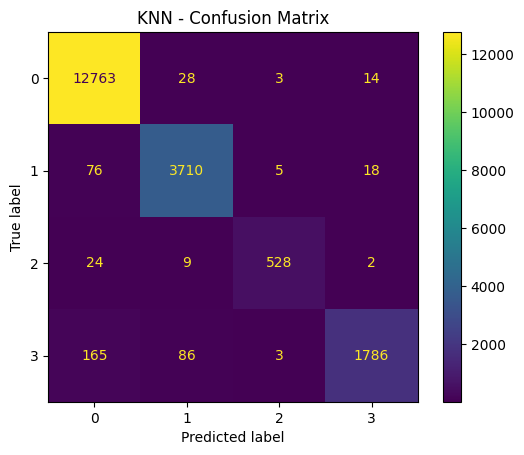

In [ ]:
"""
Train and evaluate K-Nearest Neighbors Classifier.
- Tuning n_neighbors, weights, and distance metric (p).
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()

param_grid_knn = {
    "n_neighbors": [3, 5, 11],
    "weights": ["uniform", "distance"],  # distance = closer neighbors matter more
    "p": [1, 2],  # 1 = Manhattan, 2 = Euclidean
}

print("\nRunning GridSearchCV for KNN...")
knn_grid = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
    verbose=1
)

knn_grid.fit(X_train_knn, y_train)

print("\nBest params (KNN):", knn_grid.best_params_)
print("Best CV accuracy (KNN):", f"{knn_grid.best_score_:.4f}")

knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test_knn)

knn_test_acc = accuracy_score(y_test, y_pred_knn)
print("\nKNN Test Accuracy:", f"{knn_test_acc:.4f}")

print("\nClassification report (KNN):")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
plt.figure()
disp.plot()
plt.title("KNN - Confusion Matrix")
plt.show()


In [ ]:
import joblib

feature_names = list(X_train.columns)
joblib.dump(feature_names, "feature_names.pkl")

print("Saved feature_names.pkl")


Saved feature_names.pkl


In [ ]:
joblib.dump(gb_best, "model_gradient_boosting.pkl")
print("Saved model_gradient_boosting.pkl")

Saved model_gradient_boosting.pkl


In [ ]:
import joblib

joblib.dump(knn_best, "model_knn.pkl")
joblib.dump(knn_scaler, "scaler_knn.pkl")

print("Saved model_knn.pkl and scaler_knn.pkl")


Saved model_knn.pkl and scaler_knn.pkl
